# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [ ]:
#Your code here
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [ ]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/CV/CNN",
    labels='inferred',
    label_mode='int',

)

Found 1658 files belonging to 4 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [ ]:
data_iterator=data.as_numpy_iterator()

In [ ]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

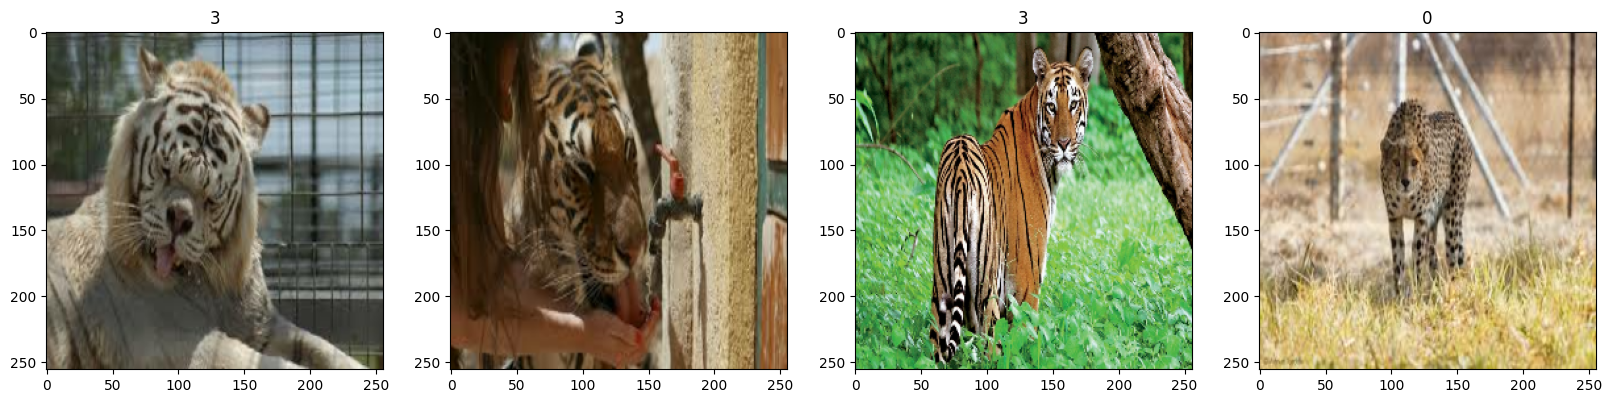

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [ ]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

6.713867e-05 1.0


**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [ ]:
dataset_size = data.cardinality().numpy()
dataset_size



52

In [ ]:
#Your code here
import tensorflow as tf

# Determine the size of the dataset
dataset_size = data.cardinality().numpy()

# Define the proportions
train_size = int(0.8 * dataset_size)  # 80% for training
test_size = int(0.2 * dataset_size)    # 20% for test


# Split the dataset
train_dataset = data.take(train_size)

test_dataset = data.skip(train_size ).take(test_size)

# Optional: Print the sizes of each set to verify
print(f"Train set size: {train_dataset.cardinality().numpy()}")

print(f"Test set size: {test_dataset.cardinality().numpy()}")

# Use the datasets (e.g., for training a model)
for image, label in train_dataset.take(1):
    print(f"Train example - image shape: {image.shape}, label: {label}")

for image, label in test_dataset.take(1):
    print(f"Test example - image shape: {image.shape}, label: {label}")



Train set size: 41
Test set size: 10
Train example - image shape: (32, 256, 256, 3), label: [1 2 2 1 0 3 3 2 1 2 2 1 1 2 0 3 3 1 1 3 3 1 0 0 0 3 1 0 0 2 2 1]
Test example - image shape: (32, 256, 256, 3), label: [0 1 0 0 1 0 3 0 1 2 3 1 1 0 3 1 3 3 3 1 1 1 1 3 3 3 3 0 2 1 0 2]


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [ ]:
class_names = data.class_names
print(class_names)
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    layers.Conv2D(200, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')

])
#   layers.Rescaling(1./255, input_shape=(256, 256, 3)),
#   layers.Conv2D(640, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(320, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(160, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(400, activation='softmax'),
#   layers.Dense(num_classes)
# ])

['Cheetah-20240720T173732Z-001', 'Crocodile-20240720T173732Z-001', 'Elephants-20240720T173733Z-001', 'Tiger-20240720T173731Z-001']


**Q.6** Compile your model

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 256, 256, 200)     5600      
                                                                 
 batch_normalization_16 (Ba  (None, 256, 256, 200)     800       
 tchNormalization)                                               
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 128, 128, 200)     0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 128, 128, 128)     230528    
                                                                 
 batch_normalization_17 (Ba  (None, 128, 128, 128)    

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [ ]:
history = model.fit(
  train_dataset,
  epochs=20
)

Epoch 1/20
41/41 [==============================] - 19s 366ms/step - loss: 69.3271 - accuracy: 0.4261
Epoch 2/20
41/41 [==============================] - 17s 386ms/step - loss: 54.7031 - accuracy: 0.4985
Epoch 3/20
41/41 [==============================] - 17s 384ms/step - loss: 36.5888 - accuracy: 0.5739
Epoch 4/20
41/41 [==============================] - 18s 374ms/step - loss: 27.3370 - accuracy: 0.5991
Epoch 5/20
41/41 [==============================] - 17s 379ms/step - loss: 20.9368 - accuracy: 0.6349
Epoch 6/20
41/41 [==============================] - 17s 371ms/step - loss: 15.8364 - accuracy: 0.6601
Epoch 7/20
41/41 [==============================] - 17s 382ms/step - loss: 12.2952 - accuracy: 0.6852
Epoch 8/20
41/41 [==============================] - 17s 379ms/step - loss: 9.8243 - accuracy: 0.6601
Epoch 9/20
41/41 [==============================] - 17s 378ms/step - loss: 8.1956 - accuracy: 0.7119
Epoch 10/20
41/41 [==============================] - 17s 373ms/step - loss: 7.6077 -

**Q.8** Test your code with test set

In [ ]:
loss,accuracy=model.evaluate(test_dataset)

10/10 [==============================] - 13s 117ms/step - loss: 4.2970 - accuracy: 0.8750


In [ ]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.875


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**